In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def initialiseWorld(size=[10,10],num_of_val=3):
    
    world = np.random.randint(num_of_val,size = size)
    
    area = size[0]*size[1]
    
    initialProbability = np.full(np.shape(world),1/area)
    
    world = np.pad(world, [(1, 1), (1, 1)], mode='constant', constant_values=num_of_val)
    
    initialProbability = np.pad(initialProbability, [(1, 1), (1, 1)], mode='constant', constant_values=0)
    
    return world, initialProbability
    

In [5]:
def moveRobot(location, world, moveProb = 0.9):
    direction = random.randint(0,3)
    worldSize = np.shape(world)
    #0 is up, 1 is right, 2 is down, 3 is left
    #returns the original location if impossible to move
    if (random.random() > moveProb) or (direction==0 and location[0] == 1) or (direction==2 and location[0] == worldSize[0]-2) or (direction==1 and location[1] == worldSize[1]-2) or (direction==3 and location[1] == 1):
        location = location   
        #print('failed to move')
        
    elif direction == 0:
        location[0] -= 1
        
            
    elif direction == 1:
        location[1] += 1
        
            
    elif direction == 2:
        location[0] += 1
        
            
    elif direction == 3:
        location[1] -= 1
    
    
    
    
    
    if direction == 0:
        #print('down') 
        direction = [-1,0]
    elif direction == 1:
        #print('left')  
        direction = [1,1]
    elif direction == 2:
        #print('up')
        direction = [1,0]
    elif direction == 3:
        #print('right')  
        direction = [-1,1]
    
    return location, direction
        
        
    
    

In [6]:
def estimateAfterMotion(worldProb, direction, moveProb = 0.9):
    
    worldSize = np.shape(worldProb)
    
    failed_move_estimate = np.multiply(worldProb, 1-moveProb)
    
    worldProb = np.roll(worldProb,direction[0],direction[1])
    
    worldProb = worldProb[1:worldSize[0]-1, 1:worldSize[1]-1]
    
    worldProb = np.pad(worldProb, [(1, 1), (1, 1)], mode='constant', constant_values=0)
    
    move_estimate = np.multiply(worldProb,moveProb)
    
    return np.add(move_estimate,failed_move_estimate)


In [7]:
def estimateAfterMeasurement(world,worldProb,location,sensorProb = 0.9):
    
    n_rows, n_cols = np.shape(world)
    
    estimate = worldProb
    
    measurement = world[location[0]][location[1]]
    
    for i_row in range(n_rows-2):
        
        for i_col in range(n_cols-2):
            
            a_row=i_row +1
            a_col=i_col +1
            
            sameMeasurement = (world[a_row][a_col] == measurement)
            
            estimate[a_row][a_col] = estimate[a_row][a_col]*(sensorProb*sameMeasurement + (1-sensorProb)*(1-sameMeasurement))
             
        
    return np.divide(estimate, np.sum(estimate))

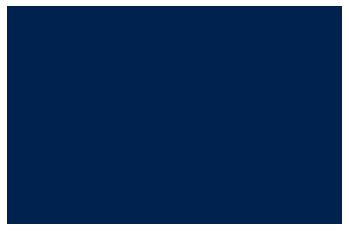

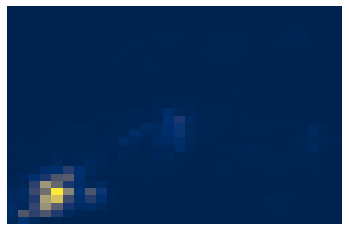

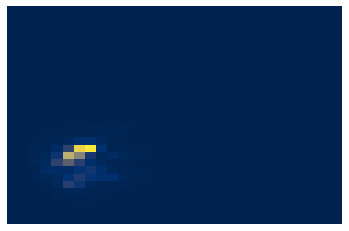

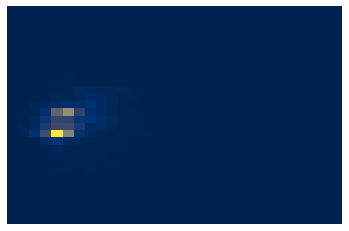

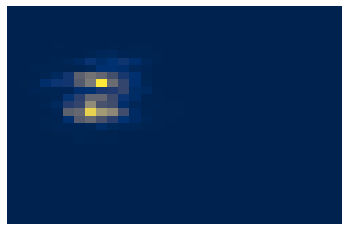

In [8]:
i = 0
world, worldProb = initialiseWorld([30,30],4)
worldSize = np.shape(worldProb)
location = [1,1]
while i < 500:
    if i % 100 == 0:
        plt.figure(i)
        plt.pcolormesh(worldProb[1:worldSize[0]-1, 1:worldSize[1]-1], cmap = 'cividis')
        #plt.colorbar()
        plt.axis('off')
        savelocation = f'Images\image{i}'
        plt.savefig(savelocation,bbox_inches='tight')
    i+=1
    location, direction = moveRobot(location, world, 0.65)
    #print(location)
    worldProb = estimateAfterMotion(worldProb, direction, 0.65)
    worldProb = estimateAfterMeasurement(world, worldProb, location, 0.65)
    

In [9]:
np.amax(worldProb)

0.11579687863859296

In [10]:
np.size(world[0])

32

In [11]:
location = [1,1]
location, direction = moveRobot(location, world, 0.9)
 #print(location)
worldProb = estimateAfterMotion(worldProb, direction, 0.9)

In [12]:
location, direction = moveRobot(location, world, 0.9)
 #print(location)
worldProb = estimateAfterMotion(worldProb, direction, 0.9)

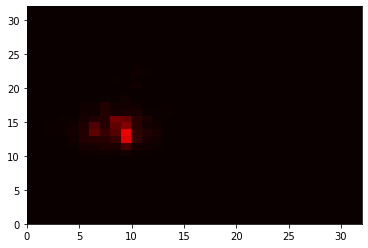

In [13]:
plt.pcolormesh(worldProb, cmap = 'hot', vmin = 0, vmax = 0.3)

In [14]:
worldProb

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.92401676e-11, 1.13638972e-10, ...,
        2.06988217e-13, 1.82203864e-14, 0.00000000e+00],
       [0.00000000e+00, 1.67568862e-09, 3.21066978e-09, ...,
        3.17080901e-12, 2.83122514e-13, 0.00000000e+00],
       ...,
       [0.00000000e+00, 4.86045043e-06, 6.48203155e-06, ...,
        6.22266190e-10, 5.81226000e-11, 0.00000000e+00],
       [0.00000000e+00, 4.46903768e-06, 7.21018209e-06, ...,
        7.32602183e-10, 7.37788338e-11, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [15]:
import os,sys
import datetime
import imageio
from pprint import pprint
import time
import datetime
e=sys.exit
 
 
def create_gif(filenames, duration):
	images = []
	for filename in filenames:
		images.append(imageio.imread(filename))
	output_file = 'Gif-%s.gif' % datetime.datetime.now().strftime('%Y-%M-%d-%H-%M-%S')
	imageio.mimsave(output_file, images, duration=duration)
 
 
if __name__ == "__main__":
    script = sys.argv.pop(0)
    duration = 0.0001 
    filenames = []
    for i in range(500):
        filenames.append(f'Images\image{i}.png')
        
    create_gif(filenames, duration)

FileNotFoundError: No such file: 'C:\Users\jfran\Desktop\UNIVERSITY\MSc\Project\ASP Robot Project\SPARC\Images\image1.png'